<a href="https://colab.research.google.com/github/hrithik2105/Time-Series-Analysis/blob/main/Timeseries(non_seasonal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis and forecasting: Non-Seasonal data

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/digitalcurrencydataset.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,1/30/2021,128437.2485,34246.28,131012.7232,34933.00,123106.8800,32825.00,128333.2124,34218.54,43072
1,1/29/2021,125144.0223,33368.18,144510.0378,38531.90,119695.5162,31915.40,128459.4509,34252.20,231827
2,1/28/2021,113870.3574,30362.19,126703.4386,33783.98,111919.8118,29842.10,125131.5709,33364.86,92621
3,1/27/2021,121753.0231,32464.01,122102.8604,32557.29,109668.1467,29241.72,113885.2090,30366.15,95911
4,1/26/2021,120966.1142,32254.19,123470.2188,32921.88,115652.4724,30837.37,121767.1246,32467.77,84972


# Preprocessing

In [ ]:
df.isnull().sum()

Date         0
open_SAR     0
open_USD     0
high_SAR     0
high_USD     0
low_SAR      0
low_USD      0
close_SAR    0
close_USD    0
volume       0
dtype: int64

No Preprocessing is required as we dont have any NULL values.

Step 2: Data Visualization

We only need date column and Volume column for the analysis. So, lets consider only those two columns and plot them.

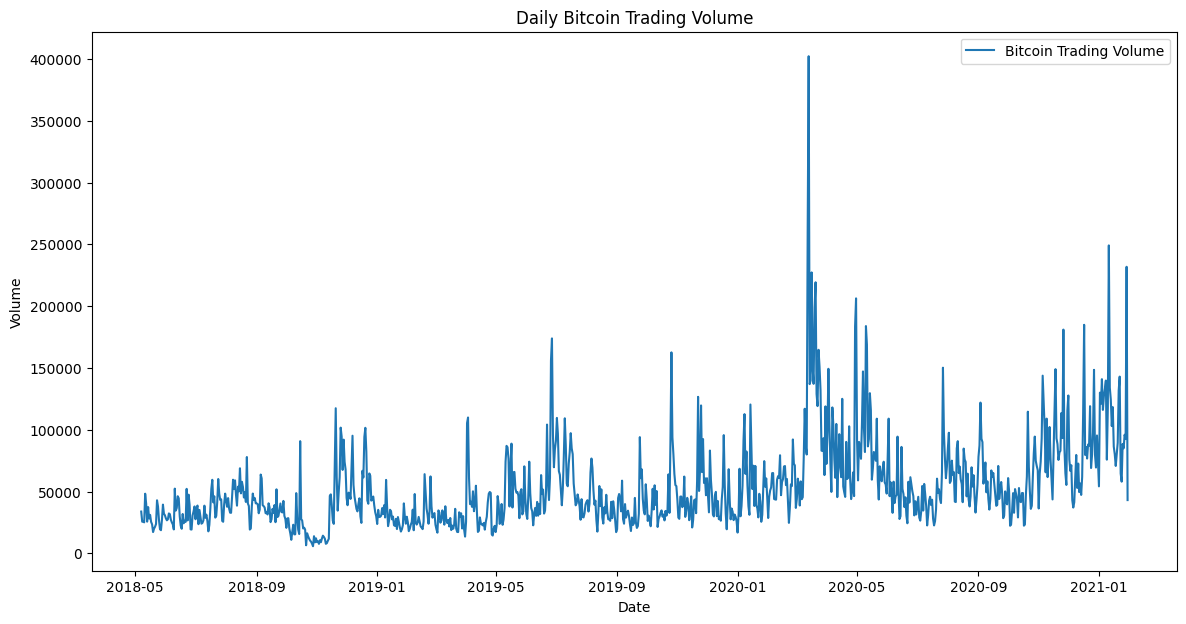

In [ ]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(df['volume'], label='Bitcoin Trading Volume')
plt.title('Daily Bitcoin Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

Checking if the dataset is stationary or not

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['volume'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.983997
p-value: 0.036416
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Since the p-value is 0.036416 which is less than 0.05 we can say that the dataset is stationary

Step3: Using Box-Jenkins Method to find the best model

First lets plot the ACF and PACF for this data

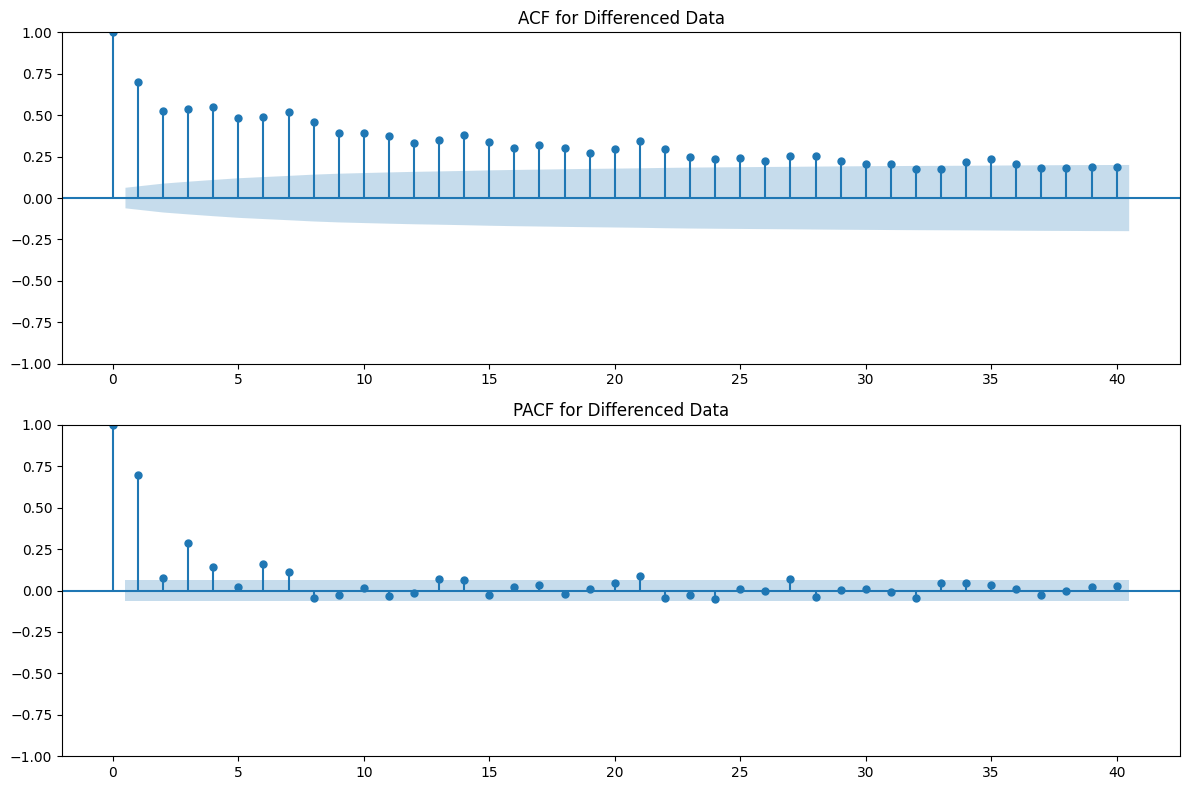

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
plot_acf(df['volume'], lags=40, ax=ax1)
ax1.set_title('ACF for the Data')

# Plot PACF
plot_pacf(df['volume'], lags=40, ax=ax2)
ax2.set_title('PACF for the Data')

plt.tight_layout()
plt.show()

Since the ACF and PACF shows significant lags at 1,2 we can try models such as ARIMA(1,0,0),(1,0,1),(2,0,0) and (2,0,1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


model1 = ARIMA(df['volume'], order=(1,0,0))
model_fit1 = model1.fit()

model2 = ARIMA(df['volume'], order=(1,0,1))
model_fit2 = model2.fit()

model3 = ARIMA(df['volume'], order=(2,0,0))
model_fit3 = model3.fit()


model4 = ARIMA(df['volume'], order=(2,0,1))
model_fit4 = model4.fit()

model5 = ARIMA(df['volume'], order=(2,0,2))
model_fit5 = model5.fit()

aic_value1 = model_fit1.aic
bic_value1= model_fit1.bic

aic_value2 = model_fit2.aic
bic_value2 = model_fit2.bic

aic_value3 = model_fit3.aic
bic_value3 = model_fit3.bic

aic_value4 = model_fit4.aic
bic_value4 = model_fit4.bic

aic_value5 = model_fit5.aic
bic_value5 = model_fit5.bic

# Print or use the AIC and BIC values
print("AIC(100):", aic_value1)
print("BIC(100):", bic_value1)
print("\nAIC(101):", aic_value2)
print("BIC(101):", bic_value2)
print("\nAIC(200):", aic_value3)
print("BIC(200):", bic_value3)
print("\nAIC(201):", aic_value4)
print("BIC(201):", bic_value4)
print("\nAIC(202):", aic_value5)
print("BIC(202):", bic_value5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

AIC(100): 23118.864721418093
BIC(100): 23133.58798725504

AIC(101): 23080.579051685498
BIC(101): 23100.210072801427

AIC(200): 23114.965625583754
BIC(200): 23134.596646699683

AIC(201): 23125.931260929607
BIC(201): 23150.470037324518

AIC(202): 23000.57691627442
BIC(202): 23030.02344794831


So, we can observe that ARIMA(2,0,2) and ARIMA(1,0,1) have the lowest AIC and BIC values. So, we'll go ahead using these models.|

Now Lets perform Residual Analysis on ARIMA(2,0,2) and ARIMA (1,0,1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

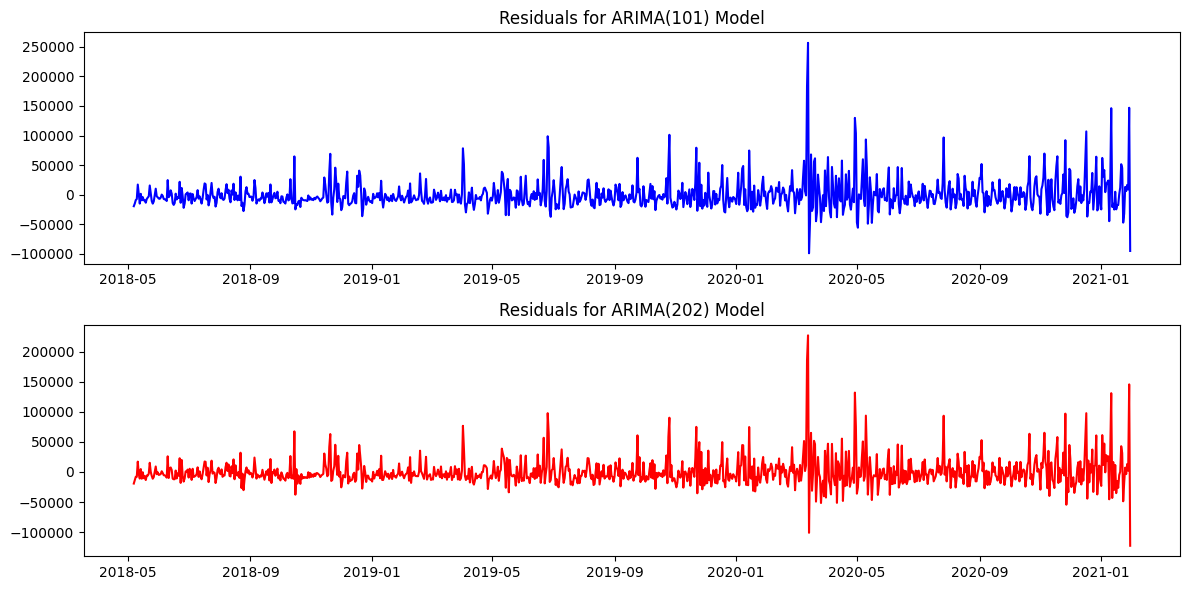

Summary Statistics for ARIMA(101) Residuals:
count      1000.000000
mean        112.044488
std       24768.008562
min      -98770.086955
25%      -12419.146524
50%       -4443.778280
75%        6711.263258
max      256542.279697
dtype: float64

Summary Statistics for ARIMA(202) Residuals:
count      1000.000000
mean        143.896474
std       23751.681817
min     -122811.130098
25%      -11429.072949
50%       -4152.801198
75%        7113.719561
max      227309.053950
dtype: float64


In [ ]:
order_arima101 = (1, 0, 1)
order_arima202 = (2, 0, 2)


model_arima101 = ARIMA(df['volume'], order=order_arima101)
model_arima202 = ARIMA(df['volume'], order=order_arima202)


fit_arima101 = model_arima101.fit()
fit_arima202 = model_arima202.fit()

# Get the residuals
residuals_arima101 = fit_arima101.resid
residuals_arima202 = fit_arima202.resid

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(residuals_arima101, color='blue')
plt.title('Residuals for ARIMA(101) Model')
plt.subplot(2, 1, 2)
plt.plot(residuals_arima202, color='red')
plt.title('Residuals for ARIMA(202) Model')
plt.tight_layout()
plt.show()

# Summary statistics of residuals
print("Summary Statistics for ARIMA(101) Residuals:")
print(residuals_arima101.describe())

print("\nSummary Statistics for ARIMA(202) Residuals:")
print(residuals_arima202.describe())

ARIMA-GARCH modelling: We will try the ARIMA-GARCH modelling for the following cases:
#### ARIMA(1,0,1)GARCH(1,0)
#### ARIMA(1,0,1)GARCH(1,1)
#### ARIMA(1,0,1)GARCH(1,2)
#### ARIMA(1,0,1)GARCH(2,0)
#### ARIMA(1,0,1)GARCH(2,1)
#### ARIMA(1,0,1)GARCH(2,2)

#### ARIMA(2,0,2)GARCH(1,0)
#### ARIMA(2,0,2)GARCH(1,1)
#### ARIMA(2,0,2)GARCH(1,2)
#### ARIMA(2,0,2)GARCH(2,0)
#### ARIMA(2,0,2)GARCH(2,1)
#### ARIMA(2,0,2)GARCH(2,2)

In [ ]:
! pip install arch
from arch import arch_model


garch10110 = arch_model(residuals_arima101, vol='Garch', p=1, q=0)
garch_fit10110 = garch10110.fit()

garch10111 = arch_model(residuals_arima101, vol='Garch', p=1, q=0)
garch_fit10111 = garch10111.fit()

garch10112 = arch_model(residuals_arima101, vol='Garch', p=1, q=2)
garch_fit10112 = garch10112.fit()

garch10120 = arch_model(residuals_arima101, vol='Garch', p=2, q=0)
garch_fit10120 = garch10120.fit()

garch10121 = arch_model(residuals_arima101, vol='Garch', p=2, q=1)
garch_fit10121 = garch10121.fit()

garch10122 = arch_model(residuals_arima101, vol='Garch', p=2, q=2)
garch_fit10122 = garch10122.fit()

garch20210 = arch_model(residuals_arima202, vol='Garch', p=1, q=0)
garch_fit20210 = garch20210.fit()

garch20211 = arch_model(residuals_arima202, vol='Garch', p=1, q=1)
garch_fit20211 = garch20211.fit()

garch20212 = arch_model(residuals_arima202, vol='Garch', p=1, q=2)
garch_fit20212 = garch20212.fit()

garch20220 = arch_model(residuals_arima202, vol='Garch', p=2, q=0)
garch_fit20220 = garch20220.fit()

garch20221 = arch_model(residuals_arima202, vol='Garch', p=2, q=1)
garch_fit20221 = garch20221.fit()

garch20222 = arch_model(residuals_arima202, vol='Garch', p=2, q=2)
garch_fit20222 = garch20222.fit()



aic_value10110 = garch_fit10110.aic
bic_value10110 = garch_fit10110.bic

aic_value10111 = garch_fit10111.aic
bic_value10111 = garch_fit10111.bic

aic_value10112 = garch_fit10112.aic
bic_value10112 = garch_fit10112.bic

aic_value10120 = garch_fit10120.aic
bic_value10120 = garch_fit10120.bic

aic_value10121 = garch_fit10121.aic
bic_value10121 = garch_fit10121.bic

aic_value10122 = garch_fit10122.aic
bic_value10122 = garch_fit10122.bic

aic_value20210 = garch_fit20210.aic
bic_value20210 = garch_fit20210.bic

aic_value20211 = garch_fit20211.aic
bic_value20211 = garch_fit20211.bic

aic_value20212 = garch_fit20212.aic
bic_value20212 = garch_fit20212.bic

aic_value20220 = garch_fit20220.aic
bic_value20220 = garch_fit20220.bic

aic_value20221 = garch_fit20221.aic
bic_value20221 = garch_fit20221.bic

aic_value20222 = garch_fit20222.aic
bic_value20222 = garch_fit20222.bic


# Print the extracted values
print(f"AIC10110: {aic_value10110}")
print(f"BIC10110: {bic_value10110}")
print(f"AIC10111: {aic_value10111}")
print(f"BIC10111: {bic_value10111}")
print(f"AIC10112: {aic_value10112}")
print(f"BIC10112: {bic_value10112}")
print(f"AIC10120: {aic_value10120}")
print(f"BIC10120: {bic_value10120}")
print(f"AIC10121: {aic_value10121}")
print(f"BIC10121: {bic_value10121}")
print(f"AIC10122: {aic_value10122}")
print(f"BIC10122: {bic_value10122}")
print(f"AIC20210: {aic_value20210}")
print(f"BIC20210: {bic_value20210}")
print(f"AIC20211: {aic_value20211}")
print(f"BIC20211: {bic_value20211}")
print(f"AIC20212: {aic_value20212}")
print(f"BIC20212: {bic_value20212}")
print(f"AIC20220: {aic_value20220}")
print(f"BIC20220: {bic_value20220}")
print(f"AIC20221: {aic_value20221}")
print(f"BIC20221: {bic_value20221}")
print(f"AIC20222: {aic_value20222}")
print(f"BIC20222: {bic_value20222}")

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.128e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.128e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScale

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11456.692411310954
Iteration:      2,   Func. Count:     10,   Neg. LLF: 11442.08234409392
Iteration:      3,   Func. Count:     14,   Neg. LLF: 11441.627715273107
Iteration:      4,   Func. Count:     18,   Neg. LLF: 11441.577834533458
Iteration:      5,   Func. Count:     22,   Neg. LLF: 11441.57626172226
Iteration:      6,   Func. Count:     26,   Neg. LLF: 11441.576228899881
Iteration:      7,   Func. Count:     30,   Neg. LLF: 11441.57610791987
Iteration:      8,   Func. Count:     34,   Neg. LLF: 11441.575804859656
Iteration:      9,   Func. Count:     38,   Neg. LLF: 11441.575152258187
Iteration:     10,   Func. Count:     42,   Neg. LLF: 11441.573103420427
Iteration:     11,   Func. Count:     46,   Neg. LLF: 11441.566089428434
Iteration:     12,   Func. Count:     50,   Neg. LLF: 11441.555846627103
Iteration:     13,   Func. Count:     54,   Neg. LLF: 11441.492041252279
Iteration:     14,   Func. Count:     58,   Neg. LLF: 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.128e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.128e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScale

Iteration:      3,   Func. Count:     19,   Neg. LLF: 11608.95267625689
Iteration:      4,   Func. Count:     25,   Neg. LLF: 11432.83856587642
Iteration:      5,   Func. Count:     30,   Neg. LLF: 11432.250968896522
Iteration:      6,   Func. Count:     35,   Neg. LLF: 11432.186901457451
Iteration:      7,   Func. Count:     40,   Neg. LLF: 11432.18385713378
Iteration:      8,   Func. Count:     45,   Neg. LLF: 11432.183825370314
Iteration:      9,   Func. Count:     50,   Neg. LLF: 11432.18379394376
Iteration:     10,   Func. Count:     55,   Neg. LLF: 11432.183671635405
Iteration:     11,   Func. Count:     60,   Neg. LLF: 11432.183289035558
Iteration:     12,   Func. Count:     65,   Neg. LLF: 11432.182488048738
Iteration:     13,   Func. Count:     70,   Neg. LLF: 11432.180073771971
Iteration:     14,   Func. Count:     75,   Neg. LLF: 11432.175857842602
Iteration:     15,   Func. Count:     80,   Neg. LLF: 11432.156611832408
Iteration:     16,   Func. Count:     85,   Neg. LLF: 1

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.636e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.636e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScale

Iteration:     19,   Func. Count:    119,   Neg. LLF: 11326.929664972886
Iteration:     20,   Func. Count:    125,   Neg. LLF: 11326.853086219886
Iteration:     21,   Func. Count:    131,   Neg. LLF: 11326.84881700422
Iteration:     22,   Func. Count:    137,   Neg. LLF: 11326.844586275263
Iteration:     23,   Func. Count:    143,   Neg. LLF: 11326.843935279769
Iteration:     24,   Func. Count:    149,   Neg. LLF: 11327.193263390858
Iteration:     25,   Func. Count:    158,   Neg. LLF: 11326.843861420351
Iteration:     26,   Func. Count:    164,   Neg. LLF: 11326.843862075115
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11326.843860797826
            Iterations: 26
            Function evaluations: 165
            Gradient evaluations: 26
Iteration:      1,   Func. Count:      6,   Neg. LLF: 11413.321891985976
Iteration:      2,   Func. Count:     12,   Neg. LLF: 11423.332432893232
Iteration:      3,   Func. Count:     19,   Neg. LLF: 11398.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.636e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.636e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScale

Iteration:     13,   Func. Count:     97,   Neg. LLF: 11330.180356770827
Iteration:     14,   Func. Count:    104,   Neg. LLF: 11330.169792642475
Iteration:     15,   Func. Count:    111,   Neg. LLF: 11330.147055812842
Iteration:     16,   Func. Count:    118,   Neg. LLF: 11330.109310086214
Iteration:     17,   Func. Count:    125,   Neg. LLF: 11329.855098817789
Iteration:     18,   Func. Count:    132,   Neg. LLF: 11328.988916961605
Iteration:     19,   Func. Count:    139,   Neg. LLF: 11327.825965048134
Iteration:     20,   Func. Count:    146,   Neg. LLF: 11326.914535856751
Iteration:     21,   Func. Count:    153,   Neg. LLF: 11326.51373564321
Iteration:     22,   Func. Count:    160,   Neg. LLF: 11326.422804961689
Iteration:     23,   Func. Count:    167,   Neg. LLF: 11326.41253227223
Iteration:     24,   Func. Count:    174,   Neg. LLF: 11326.412419972483
Iteration:     25,   Func. Count:    181,   Neg. LLF: 11326.412422897274
Optimization terminated successfully    (Exit mode 0)

We can see from above that for ARIMA(2,0,2)GARCH(1,2), the value of AIC and BIC is the lowest. So we will be going with that.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-40-300a65cb9b5f>:13: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=df.index[-1], periods=forecast_periods + 1, closed='right')[1:]


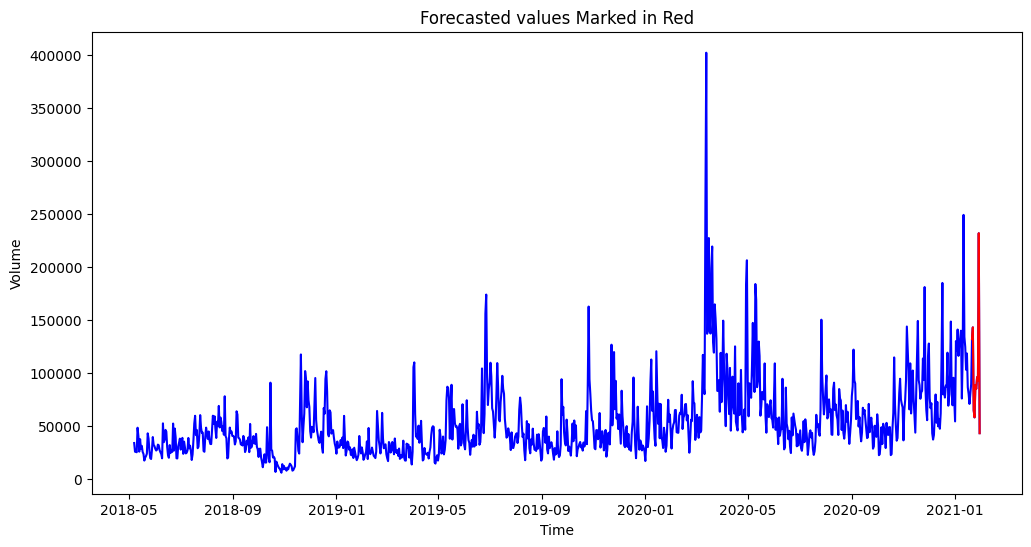

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

p_arima = 2
d_arima = 0
q_arima = 2

arima_model = ARIMA(df['volume'], order=(p_arima, d_arima, q_arima))
arima_fit = arima_model.fit()

forecast_periods = 10
forecast = arima_fit.forecast(steps=forecast_periods)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_periods + 1, closed='right')[1:]

red_periods = 10
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['volume'], color='blue')

plt.plot(df.index[-red_periods:], df['volume'].tail(red_periods), color='red')
plt.title('Forecasted values Marked in Red'.format(red_periods))
plt.xlabel('Time')
plt.ylabel('Volume')
# the plot
plt.show()

# Conclusion
The ARIMA-GARCH model forecast for the 'volume' time series data reveals a continuation of the observed pattern into the future, suggesting a steady or slightly increasing mean level.

